In [2]:
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
from matplotlib.pyplot import plot, title, axis

In [3]:
set_default()

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

torch.Size([1000, 2])
torch.Size([1000])


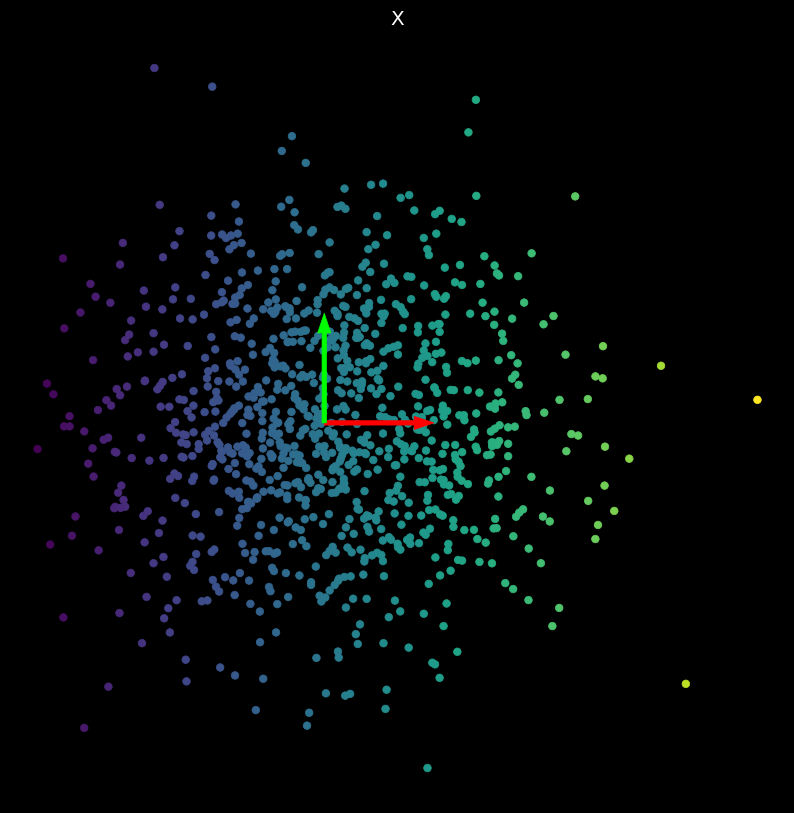

In [13]:
#generate some points in 2D space
n_points = 1000
X = torch.randn(n_points, 2).to(device)
colors = X[:, 0]
print(X.shape)
print(colors.shape)
show_scatterplot(X, colors, title = 'X')
#plotting the arrows from (0,0) to (0,1) and (1,0)
OI = torch.cat((torch.zeros(2,2), torch.eye(2))).to(device)
plot_bases(OI)

# Visualizing the Linear Transformations

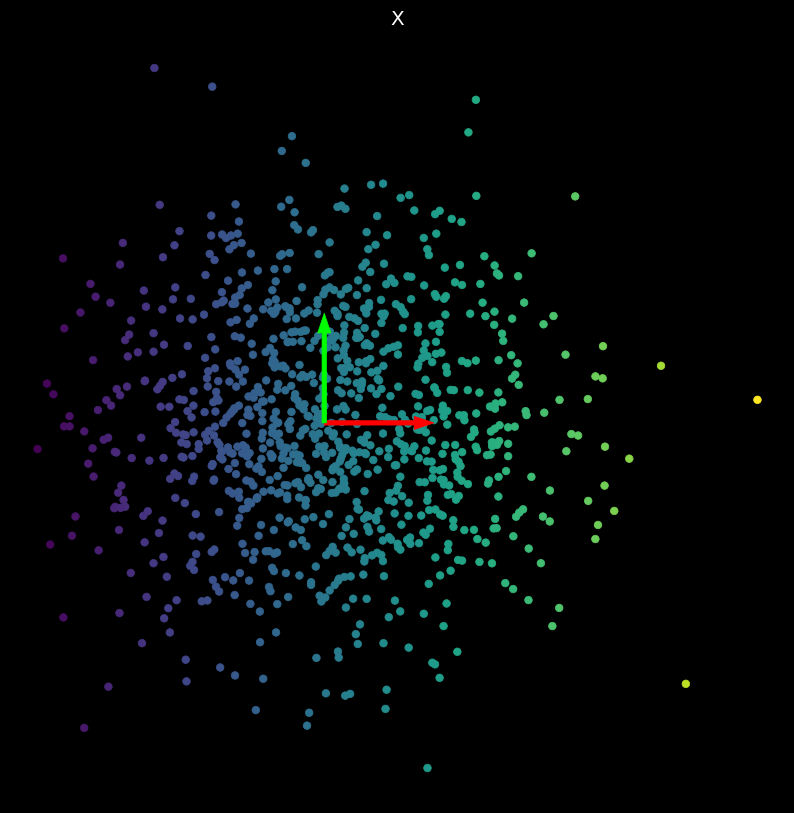

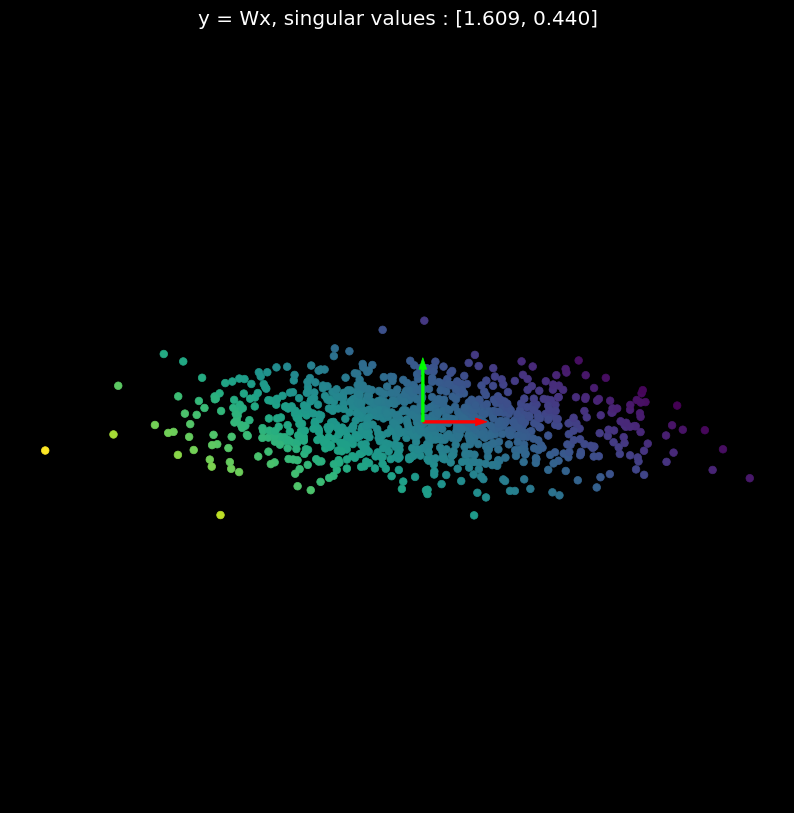

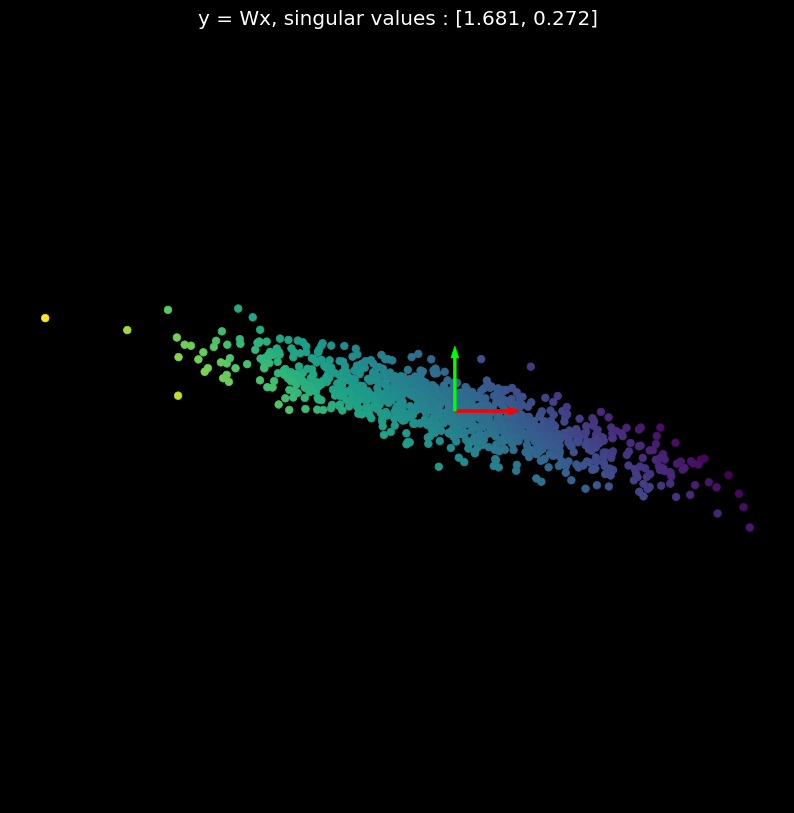

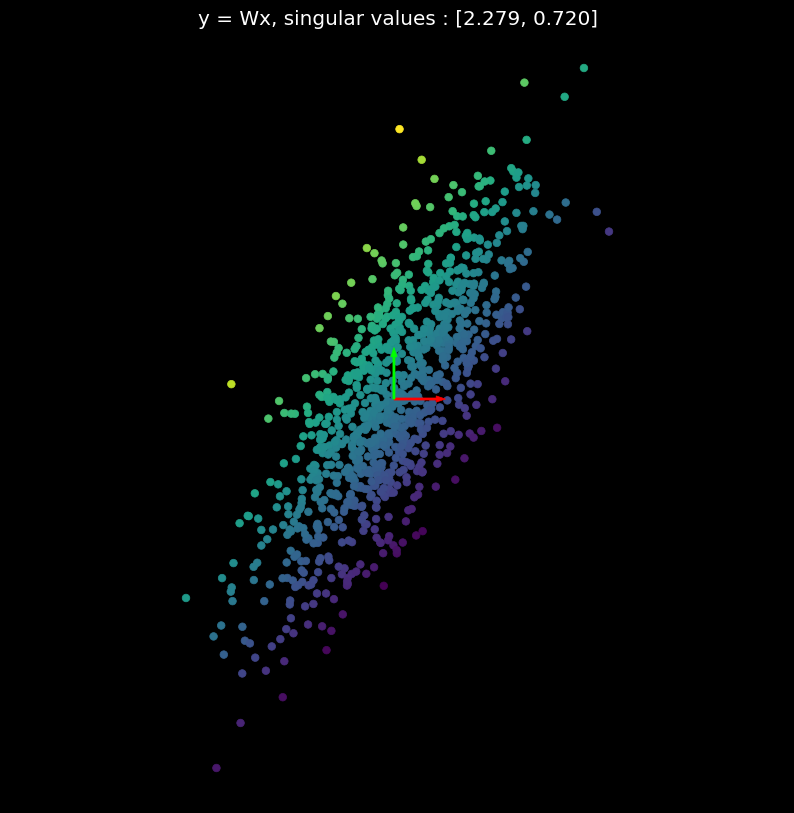

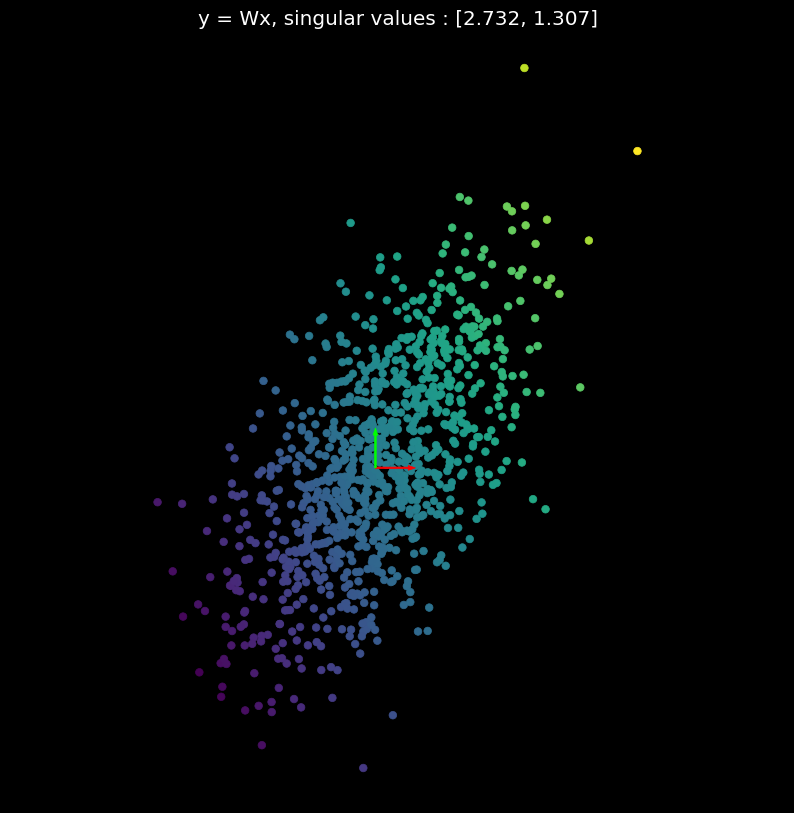

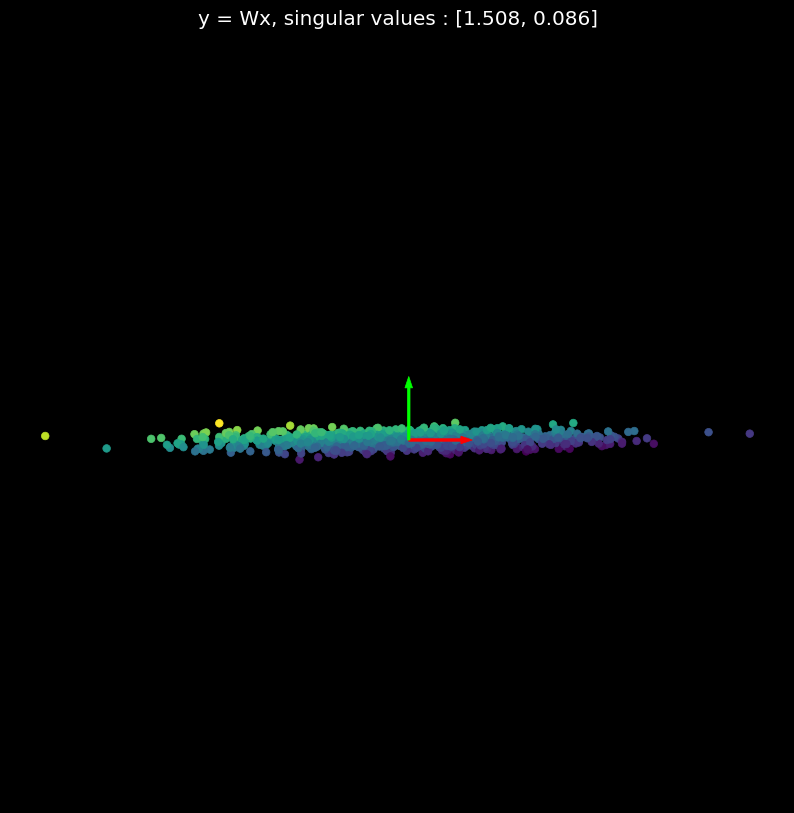

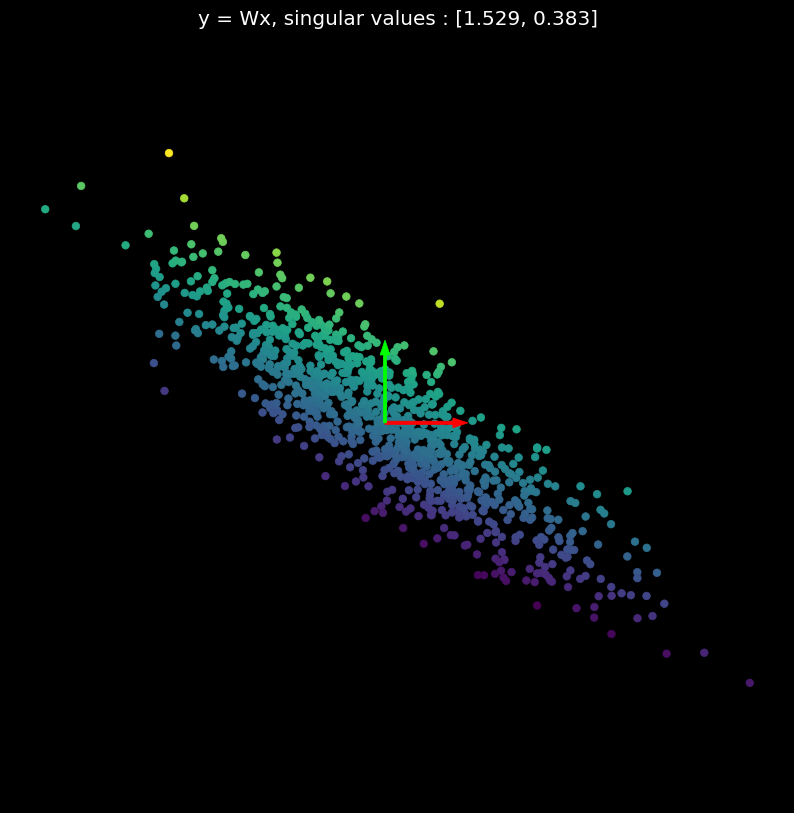

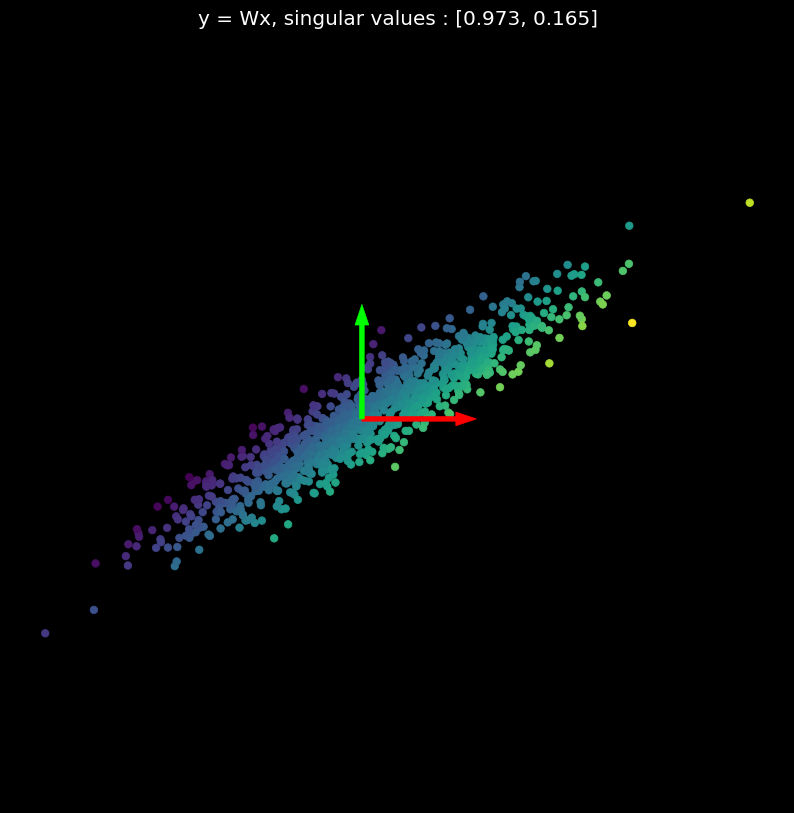

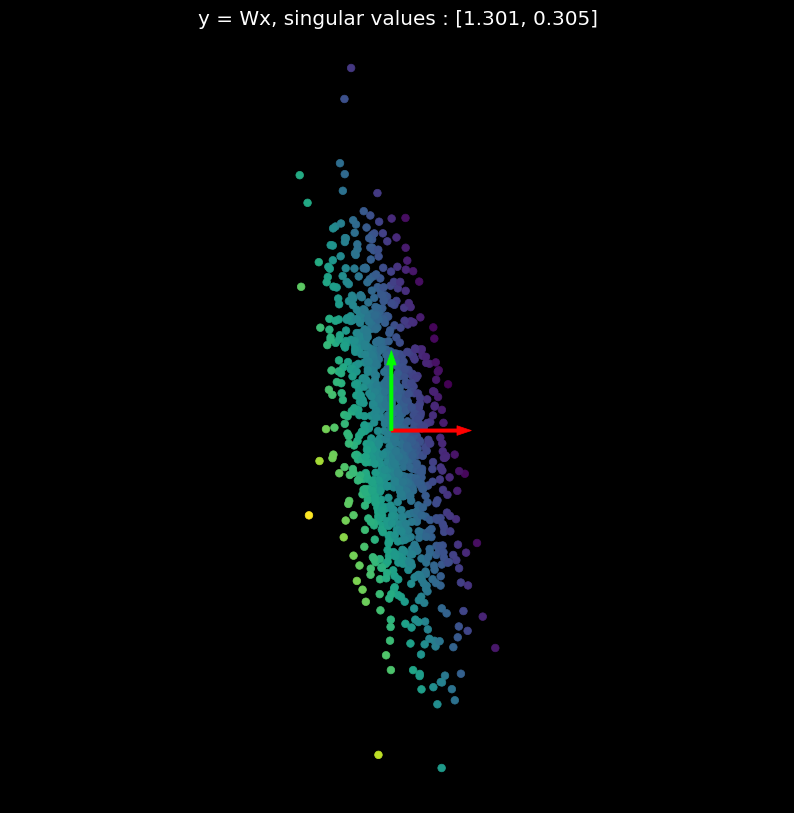

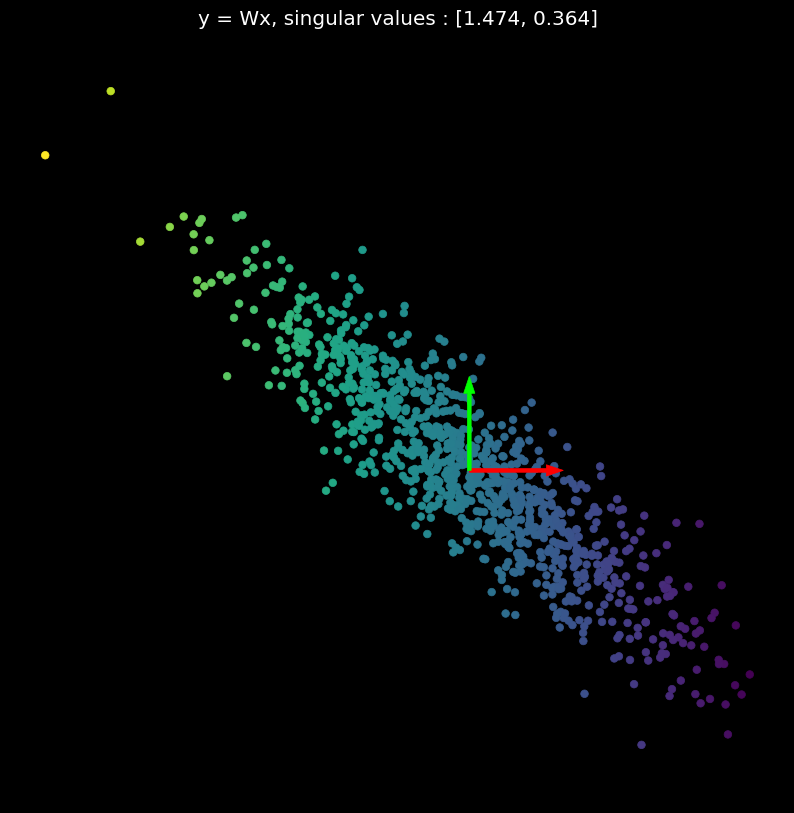

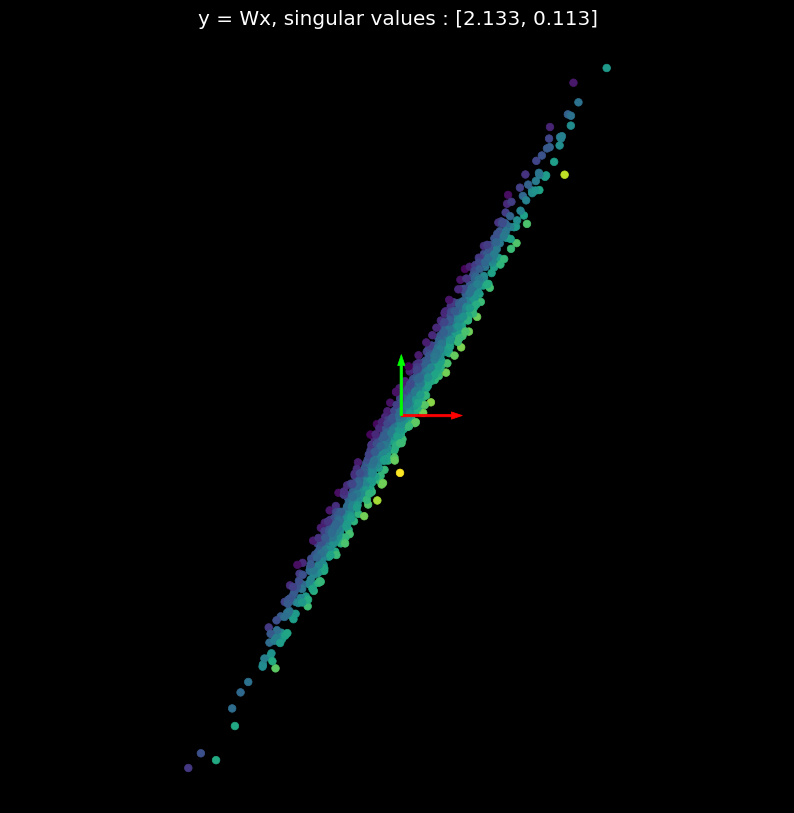

In [16]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

for i in range(10):
    #create a random matrix
    W = torch.randn(2,2).to(device)
    #transform points
    Y = X @ W.t()
    #compute singular values
    U,S,V = torch.svd(W)
#     print(U)
#     print(S)
#     print(V)
    show_scatterplot(Y, colors, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))
    #trasnform the basis
    new_OI = OI @ W.t()
    #plot old and new basis
    plot_bases(OI)
    

# Linear Transformation with Pytorch

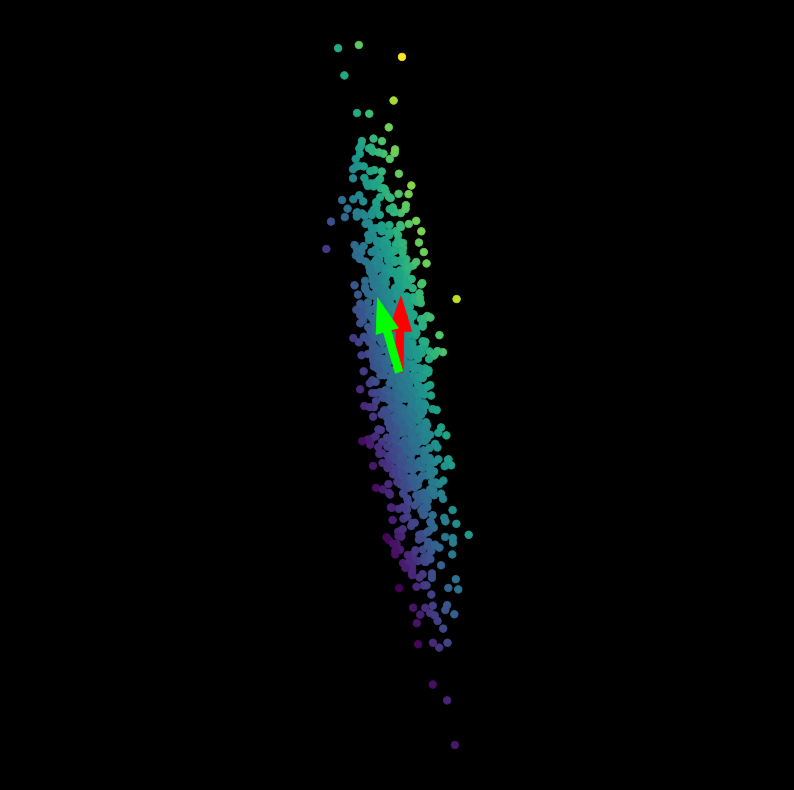

In [18]:
model = nn.Sequential(
        nn.Linear(2,2, bias=False)
        )
model.to(device)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y, colors)
    plot_bases(model(OI))

# Non-Linear Transform: Map Points to a Square

Text(0.5, 1.0, 'tanh() non linearity')

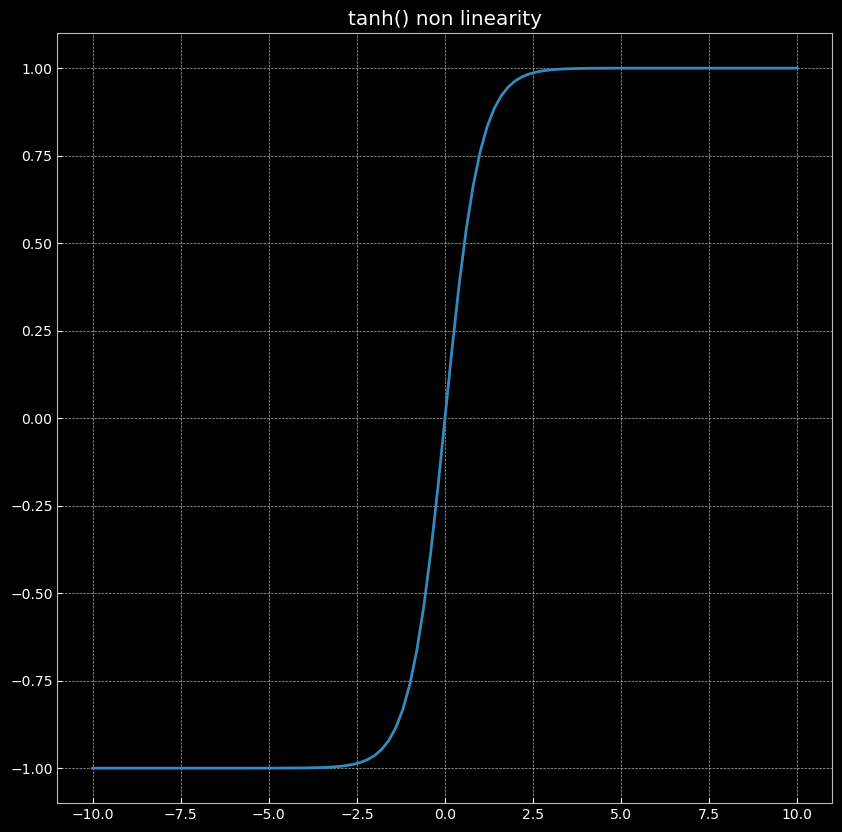

In [20]:
z = torch.linspace(-10, 10, 101)
s = torch.tanh(z)
plot(z.numpy(), s.numpy())
title('tanh() non linearity')

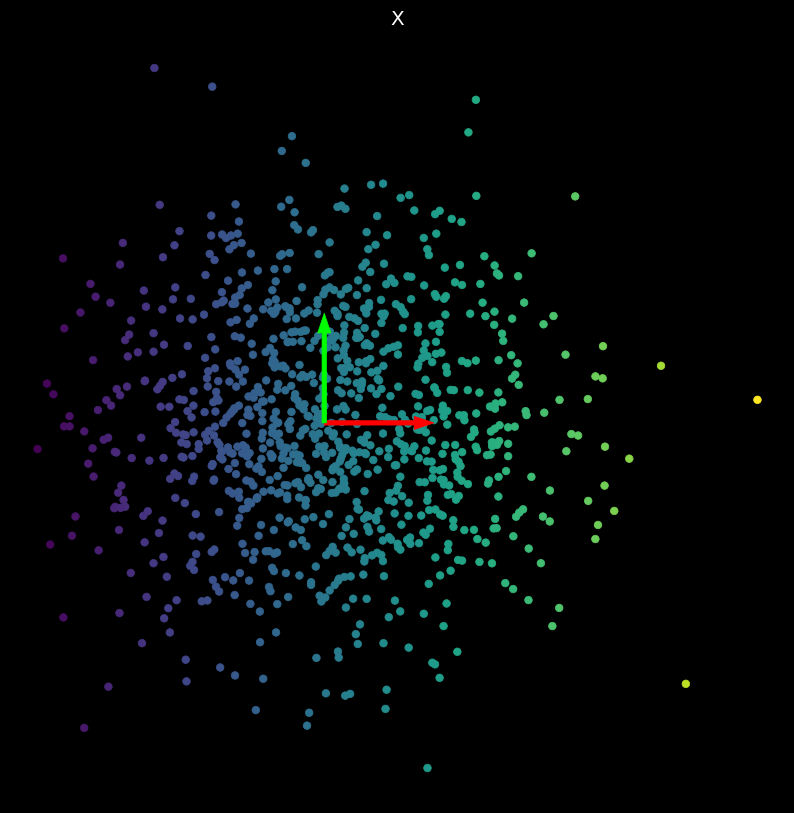

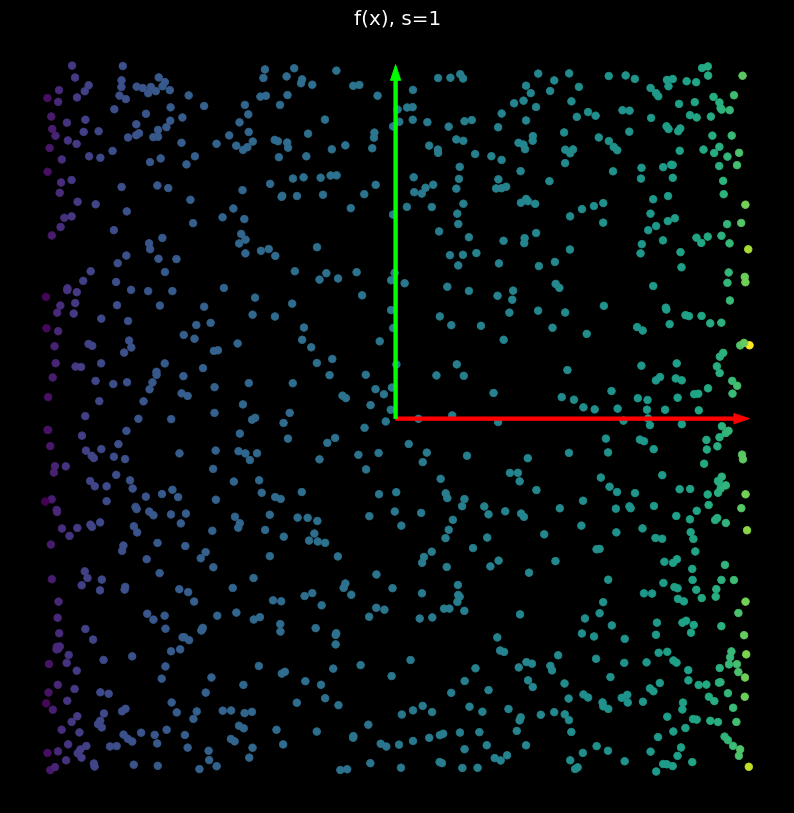

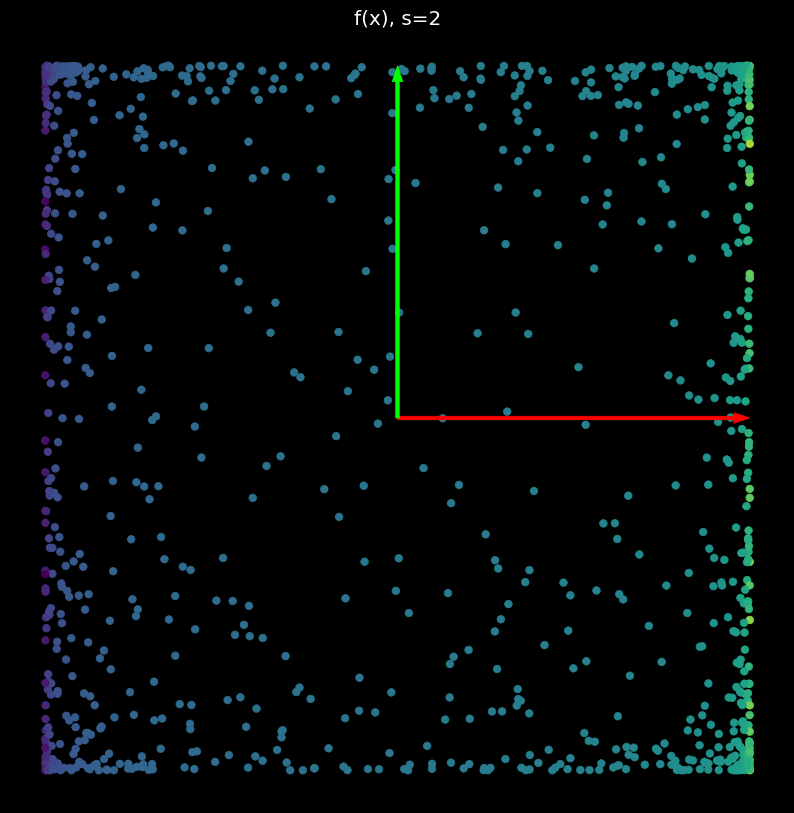

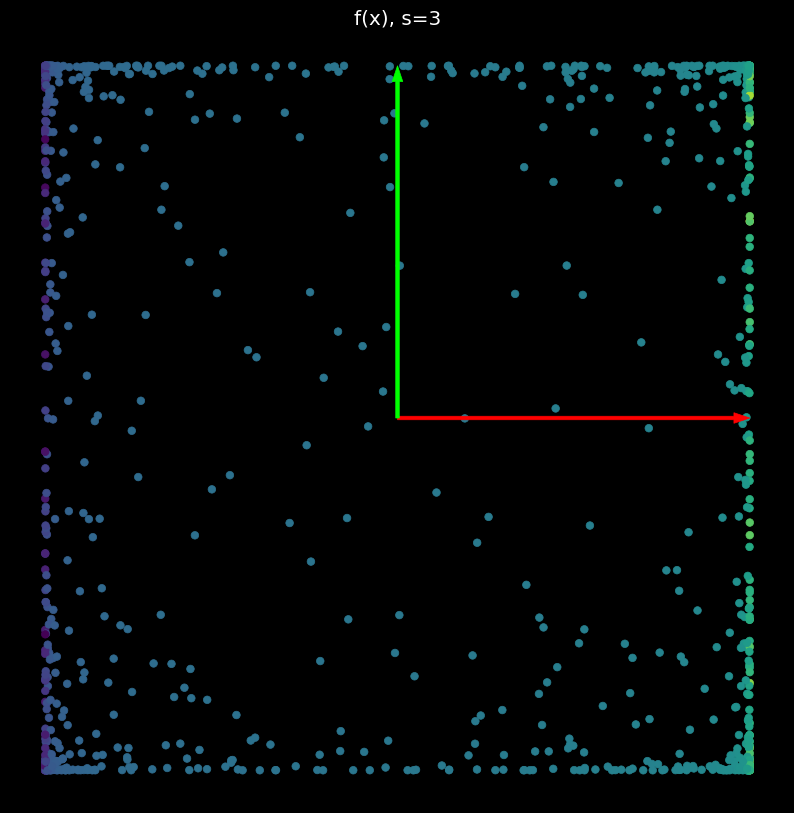

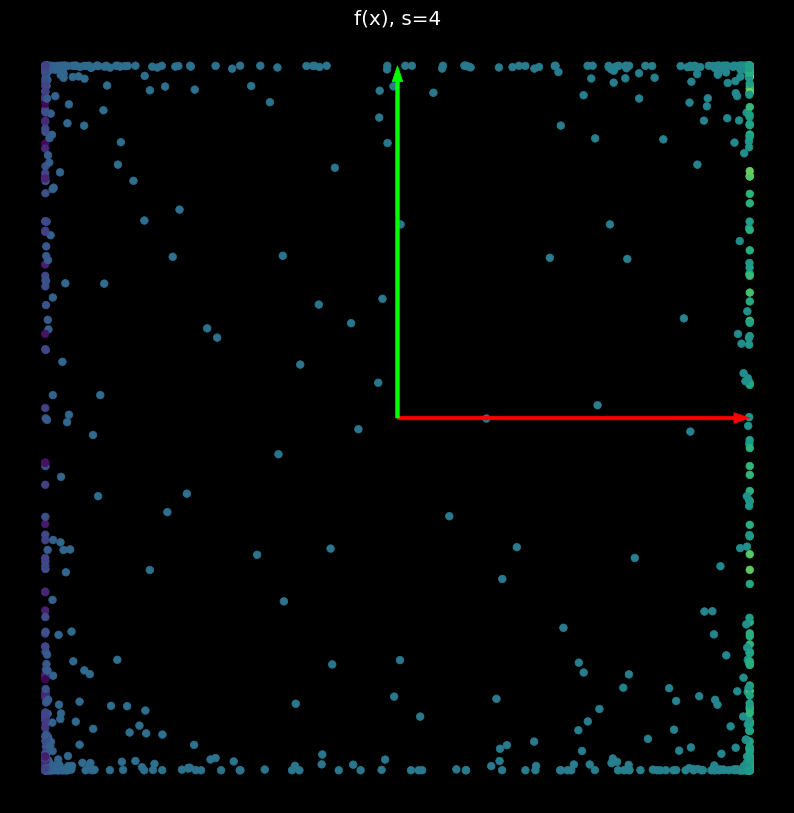

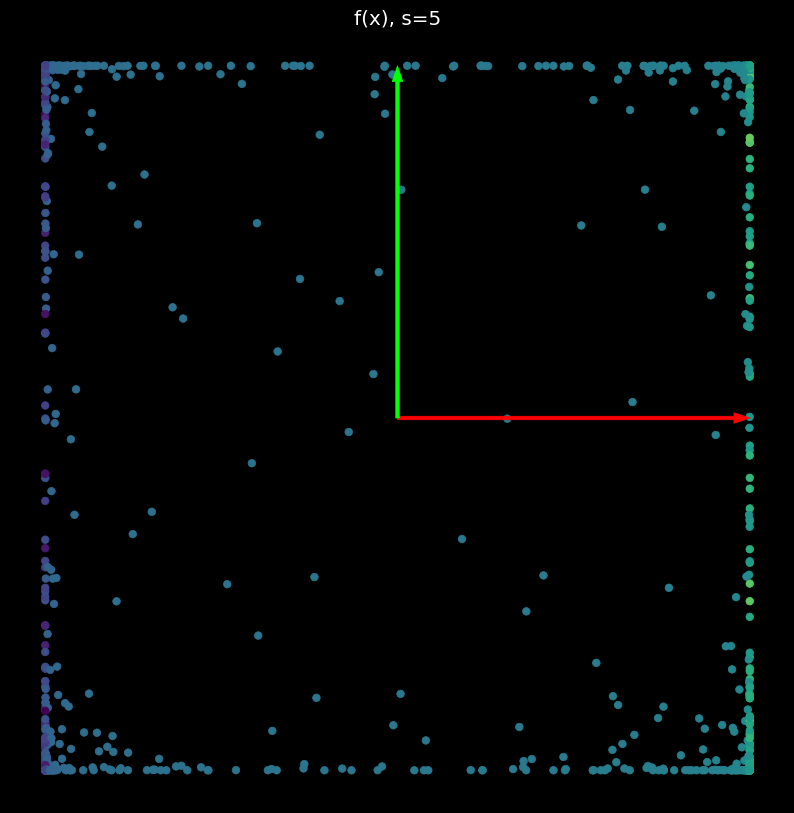

In [22]:
show_scatterplot(X, colors, title='X')
plot_bases(OI)

model = nn.Sequential(
        nn.Linear(2,2, bias=False),
        nn.Tanh()
)

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, colors, title=f'f(x), s={s}')
    plot_bases(OI, width=0.01)

# Visualize Functions Represented by Random Neural Networks

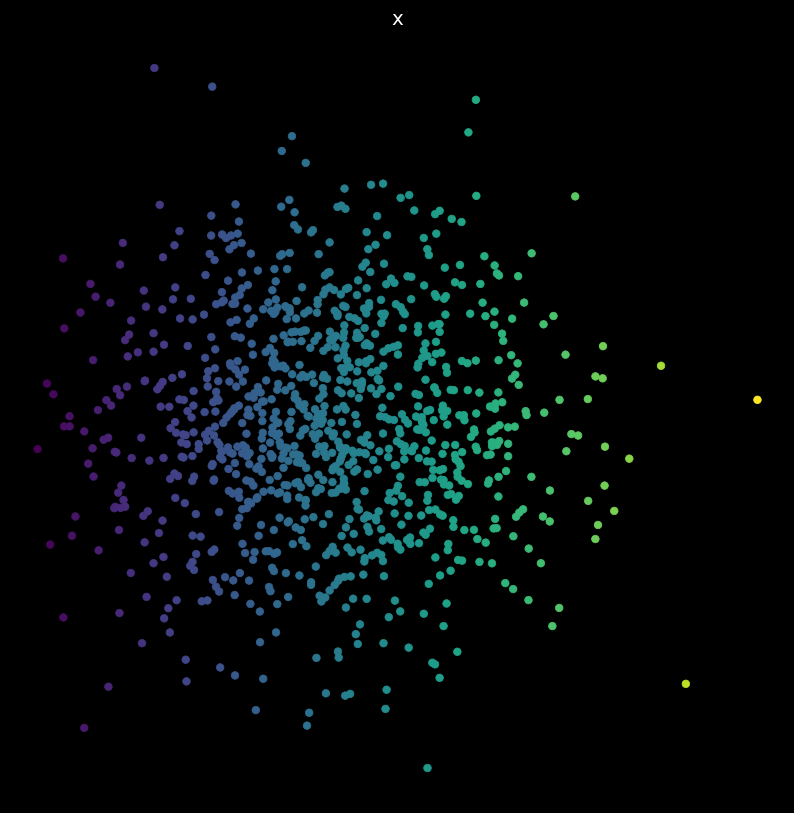

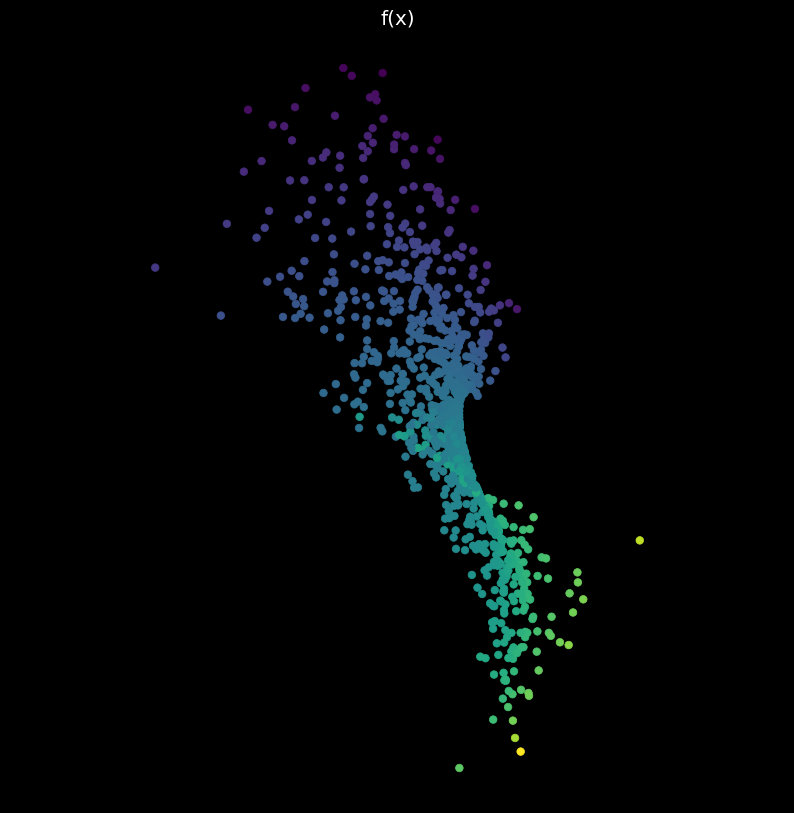

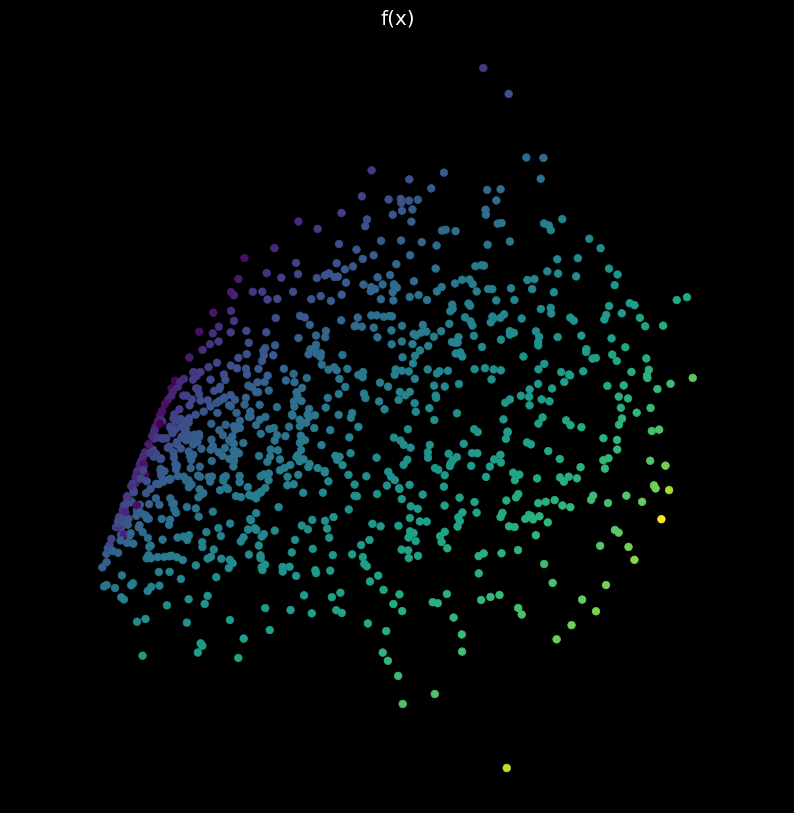

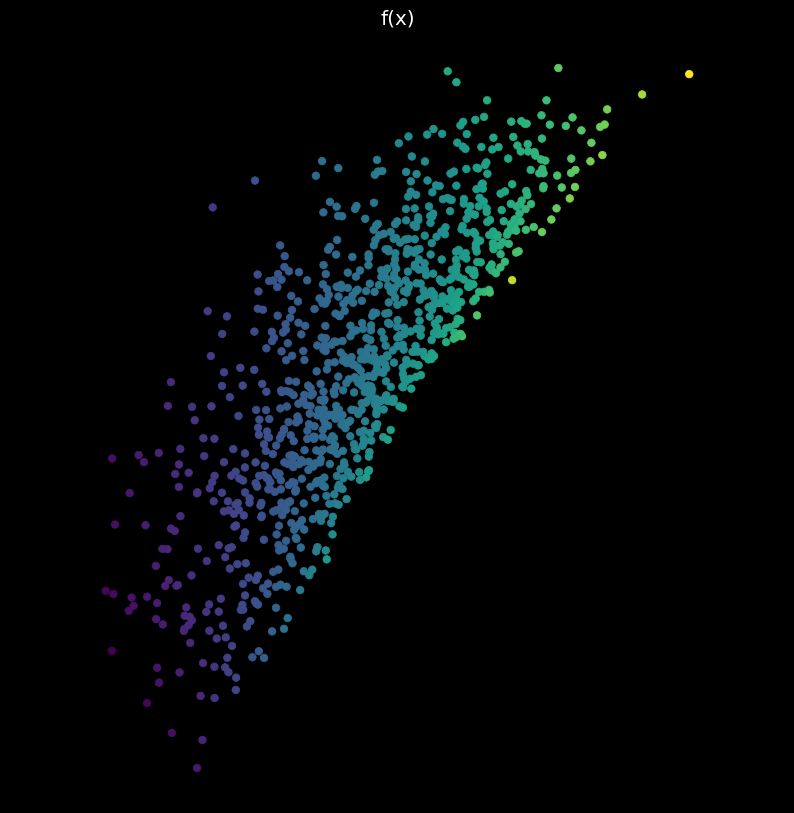

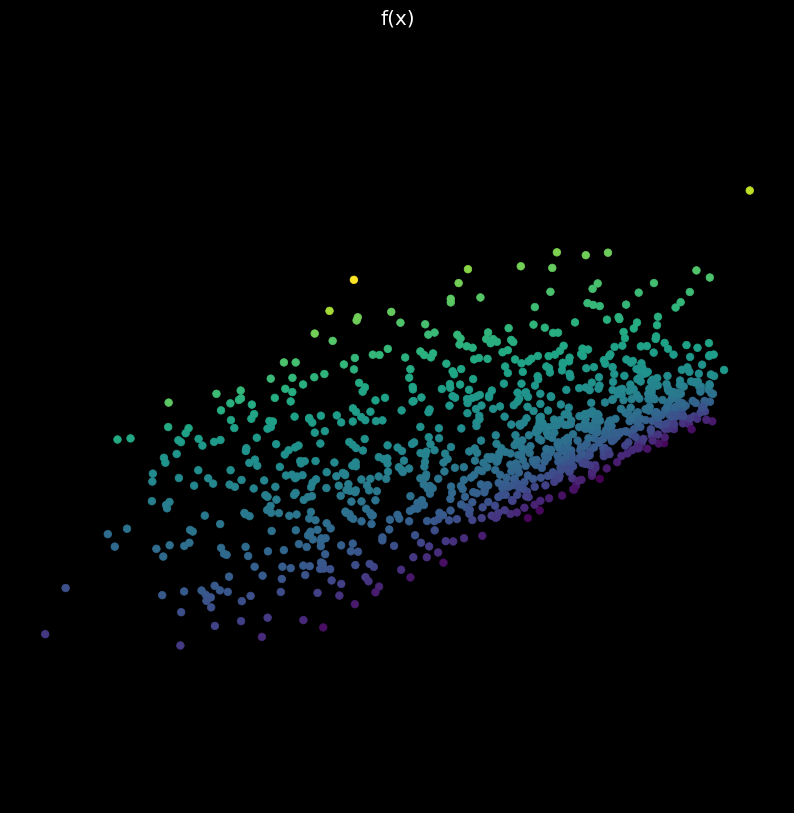

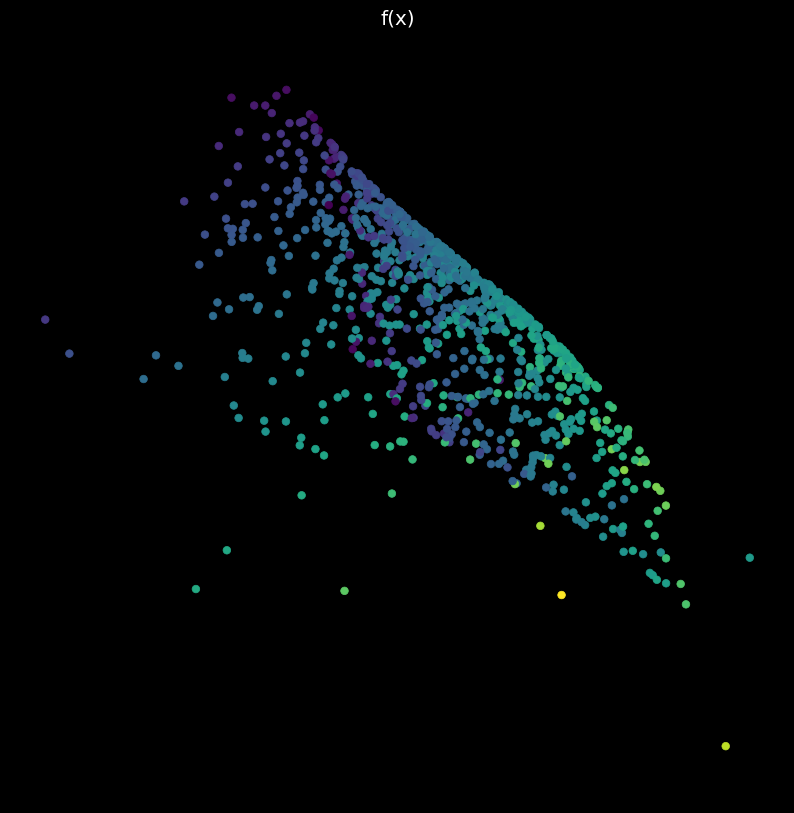

In [23]:
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    # create 1-layer neural networks with random weights
    model = nn.Sequential(
            nn.Linear(2, n_hidden), 
            NL, 
            nn.Linear(n_hidden, 2)
        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, colors, title='f(x)')
#     plot_bases(OI)

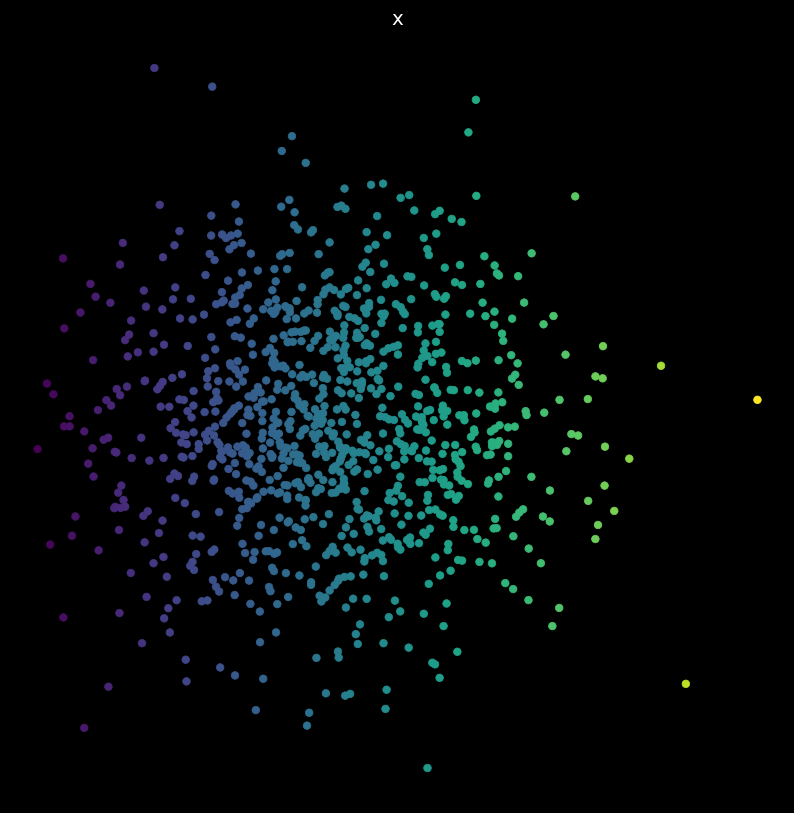

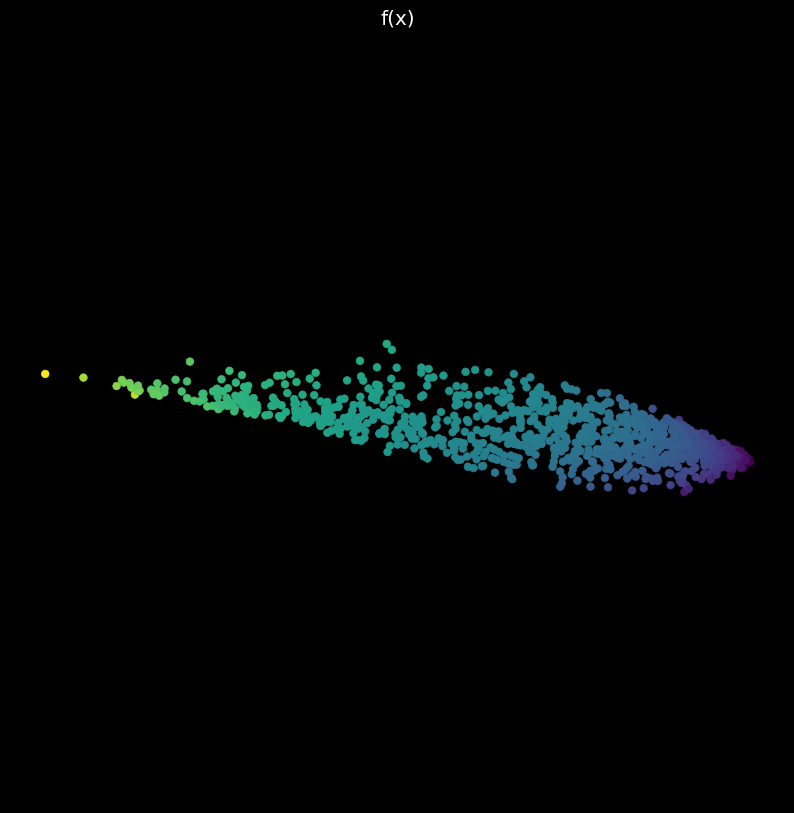

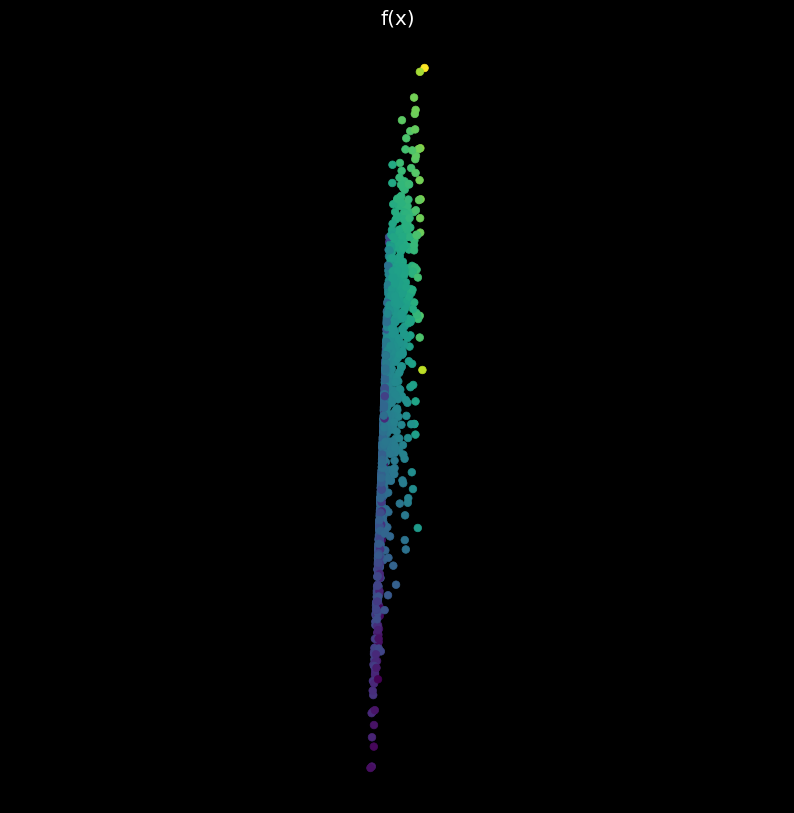

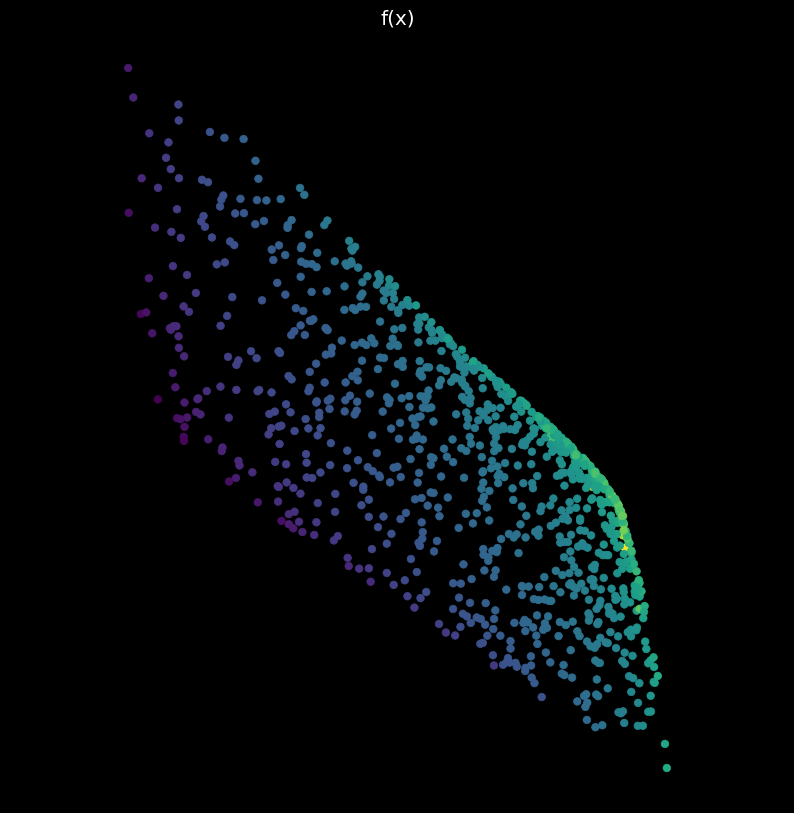

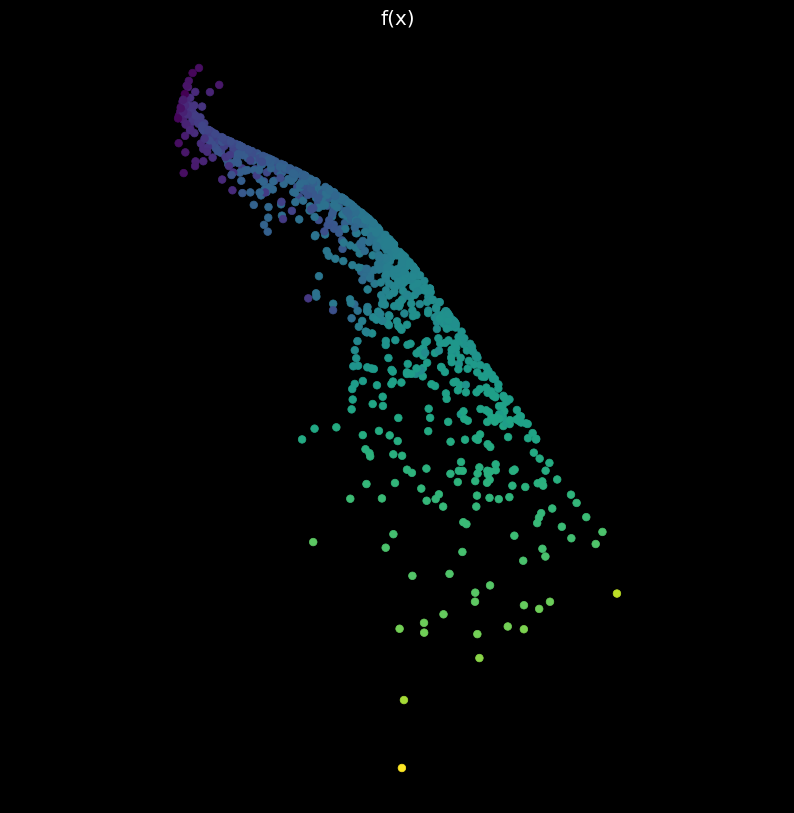

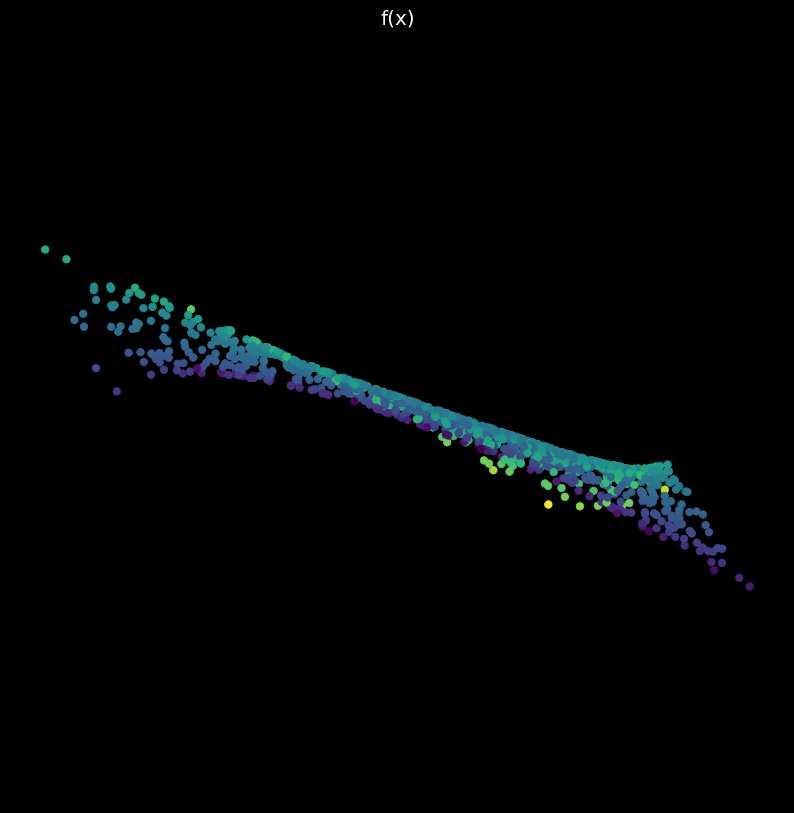

In [24]:
# deeper network with random weights
show_scatterplot(X, colors, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, colors, title='f(x)')